---
Mengumpulkan data

- Mengimport Libraries

In [2]:
import seaborn as sns
import pandas as pd

- Megambil Data Dengan Dimasukkan Ke Variabel Tertentu

In [3]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
Analisis data eksploratori

- Mengecek Info Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- Mengecek Deskripsi Data

In [5]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Mengecek Berapa Banyak Data Yang Kosong

In [6]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


- Mengecek Berapa Banyak Data Yang Duplikat

In [7]:
data.duplicated().sum()

np.int64(107)

---
Mempersiapkan data

- Menghapus Data Duplikat

In [8]:
data.drop_duplicates(inplace=True)

- Melihat Data 5 Row

In [9]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- Mengubah Tipe Data Yang Lain Menjadi Tipe Data Angka

In [10]:
from sklearn.preprocessing import OrdinalEncoder

orr = OrdinalEncoder()
dtype_not_number = ["object", "category", "bool"]
column_dtype_not_number = data.select_dtypes(dtype_not_number).columns
data[column_dtype_not_number] = orr.fit_transform(data[column_dtype_not_number])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     784 non-null    int64  
 1   pclass       784 non-null    int64  
 2   sex          784 non-null    float64
 3   age          678 non-null    float64
 4   sibsp        784 non-null    int64  
 5   parch        784 non-null    int64  
 6   fare         784 non-null    float64
 7   embarked     782 non-null    float64
 8   class        784 non-null    float64
 9   who          784 non-null    float64
 10  adult_male   784 non-null    float64
 11  deck         202 non-null    float64
 12  embark_town  782 non-null    float64
 13  alive        784 non-null    float64
 14  alone        784 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 98.0 KB


- Mengisi Data Yang Kosong Dan Mengecek Berapa Banyak Data Yang Kosong

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_impute = IterativeImputer()
column_that_has_null = list(data.isnull().sum().index)
data[column_that_has_null] = iter_impute.fit_transform(data[column_that_has_null])
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


- Melihat 5 Row

In [12]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,2.0,1.0,1.0,5.415615,2.0,0.0,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0,2.0,0.0,2.000000,0.0,1.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,2.0,2.0,0.0,5.227158,2.0,1.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,0.0,2.0,0.0,2.000000,2.0,1.0,0.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,2.0,1.0,1.0,4.932005,2.0,0.0,1.0


- Membagi Data Menjadi Data Train Dan Data Test

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(["survived", "alive"], axis=1)
y = data["survived"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

- Membuat Function 'evaluate_threshold'

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_threshold(model, X_test, y_test, thresholds=[0.3, 0.4, 0.5, 0.6, 0.7]):
    y_proba = model.predict_proba(X_test)[:, 1]
    print("Threshold | Precision | Recall | F1-score")
    print("-------------------------------------------")
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(f"{t:8.2f} | {precision:9.2f} | {recall:6.2f} | {f1:8.2f}")


- Membuat Function 'plot_precision_recall'

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


def plot_precision_recall(model, X_test, y_test, label='Model'):
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)

    plt.figure(figsize=(8,6))
    plt.plot(recall, precision, label=f'{label} (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


- Membuat Function 'plot_roc'

In [16]:
def plot_roc(models, X_test, y_test):
    plt.figure(figsize=(8,6))
    for name, model in models:
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()


---
Memilih dan melatih model

- Menggunakan Metode 'LogisticRegression'

In [17]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
logic_regress = log_model.fit(X_train, y_train)
y_pred = logic_regress.predict(X_test)

---
Mengevaluasi model

- Mengecek Score Data Test Menggunakan Metode 'LogisticRegression'

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.826530612244898

- Mengecek Score Data Train Menggunakan Metode 'LogisticRegression'

In [19]:
log_model.score(X_train, y_train)

0.8095238095238095

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())

Cross-validation scores: [0.80254777 0.78980892 0.77707006 0.8089172  0.86538462]
Mean CV score: 0.8087457128858404


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96 16]
 [18 66]]
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       112
         1.0       0.80      0.79      0.80        84

    accuracy                           0.83       196
   macro avg       0.82      0.82      0.82       196
weighted avg       0.83      0.83      0.83       196



AUC Score: 0.8820153061224489


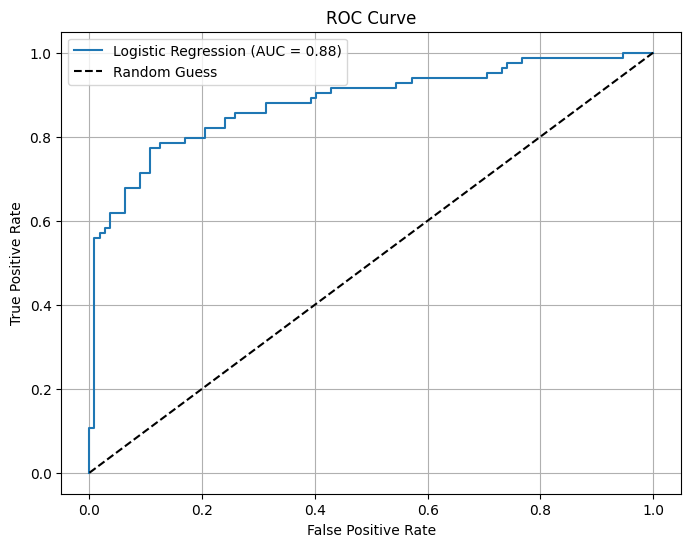

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = logic_regress.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
evaluate_threshold(logic_regress, X_test, y_test)

Threshold | Precision | Recall | F1-score
-------------------------------------------
    0.30 |      0.69 |   0.86 |     0.77
    0.40 |      0.75 |   0.80 |     0.77
    0.50 |      0.80 |   0.79 |     0.80
    0.60 |      0.85 |   0.71 |     0.77
    0.70 |      0.94 |   0.57 |     0.71


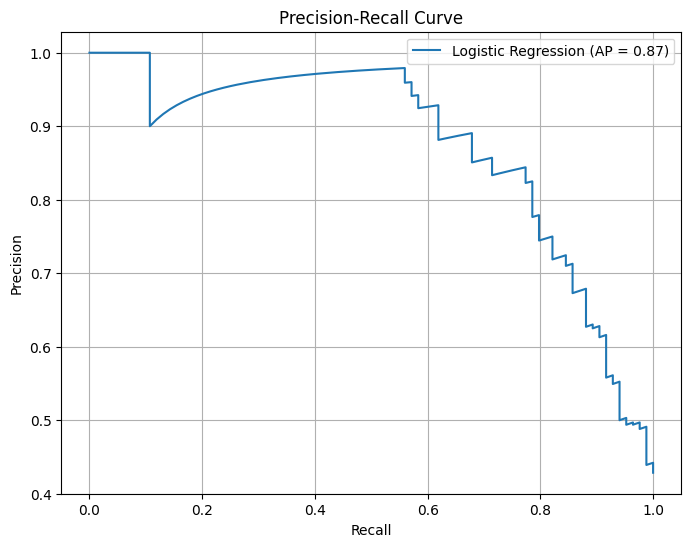

In [24]:
plot_precision_recall(logic_regress, X_test, y_test, label='Logistic Regression')

---
Memilih dan melatih mode

- Menggunakan Metode 'RandomForestClassifier'

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)
rand_for_class = rf_model.fit(X_train, y_train)
y_pred = rand_for_class.predict(X_test)

---
Mengevaluasi model

- Mengecek Score Data Test Menggunakan Metode 'RandomForestClassifier'

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8469387755102041

- Mengecek Data Train Menggunakan Metode 'RandomForestClassifier'

In [27]:
rf_model.score(X_train, y_train)

0.8554421768707483

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())

Cross-validation scores: [0.8089172  0.82165605 0.82802548 0.8089172  0.8525641 ]
Mean CV score: 0.8240160052261963


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[107   5]
 [ 25  59]]
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       112
         1.0       0.92      0.70      0.80        84

    accuracy                           0.85       196
   macro avg       0.87      0.83      0.84       196
weighted avg       0.86      0.85      0.84       196



AUC Score: 0.9319727891156463


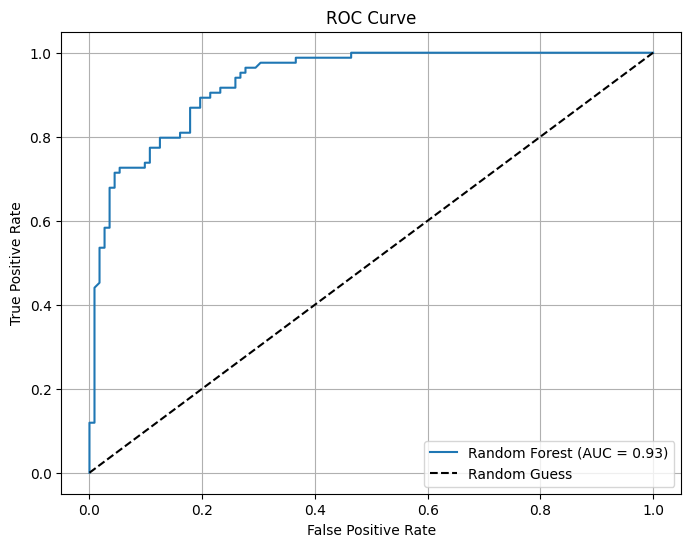

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = rand_for_class.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
evaluate_threshold(rand_for_class, X_test, y_test)

Threshold | Precision | Recall | F1-score
-------------------------------------------
    0.30 |      0.73 |   0.92 |     0.81
    0.40 |      0.82 |   0.79 |     0.80
    0.50 |      0.92 |   0.70 |     0.80
    0.60 |      0.92 |   0.58 |     0.72
    0.70 |      0.96 |   0.54 |     0.69


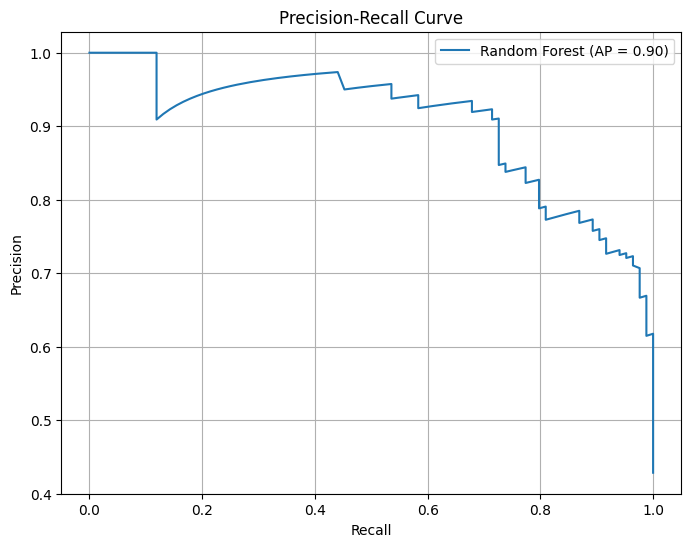

In [32]:
plot_precision_recall(rand_for_class, X_test, y_test, label='Random Forest')

---
Memilih dan melatih mode

- Menggunakan Metode 'KNeighborsClassifier'

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_scaled, y)
knn_model = grid.best_estimator_

y_pred = knn_model.predict(X_test)
y_proba = knn_model.predict_proba(X_test)[:, 1]


print("Best K:", grid.best_params_)
print("Best score:", grid.best_score_)


Best K: {'n_neighbors': 5}
Best score: 0.8176792422015353


---
Mengevaluasi model

- Mengecek Score Data Test Menggunakan Metode 'KNeighborsClassifier'

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8622448979591837

- Mengecek Score Data Train Menggunakan Metode 'KNeighborsClassifier'

In [35]:
knn_model.score(X_train, y_train)

0.8707482993197279

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model, X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())

Cross-validation scores: [0.7388535  0.79617834 0.84713376 0.82802548 0.87820513]
Mean CV score: 0.8176792422015353


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102  10]
 [ 17  67]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       112
         1.0       0.87      0.80      0.83        84

    accuracy                           0.86       196
   macro avg       0.86      0.85      0.86       196
weighted avg       0.86      0.86      0.86       196



AUC Score: 0.9423363095238095


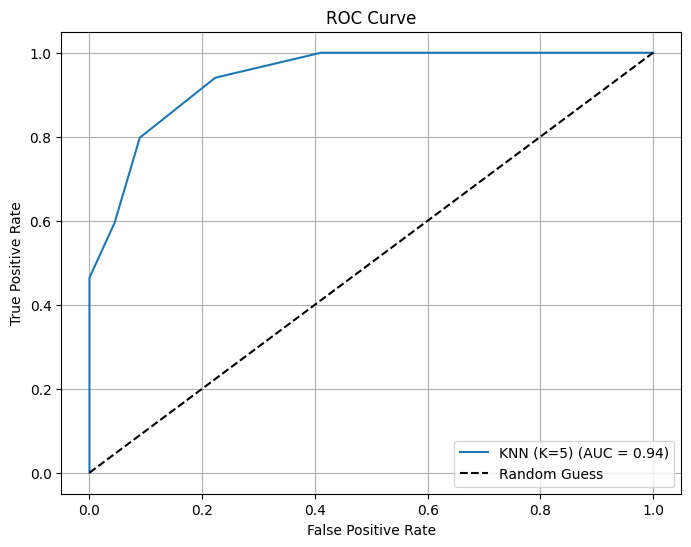

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = grid.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'KNN (K=5) (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
evaluate_threshold(grid.best_estimator_, X_test, y_test)

Threshold | Precision | Recall | F1-score
-------------------------------------------
    0.30 |      0.76 |   0.94 |     0.84
    0.40 |      0.76 |   0.94 |     0.84
    0.50 |      0.87 |   0.80 |     0.83
    0.60 |      0.87 |   0.80 |     0.83
    0.70 |      0.91 |   0.60 |     0.72


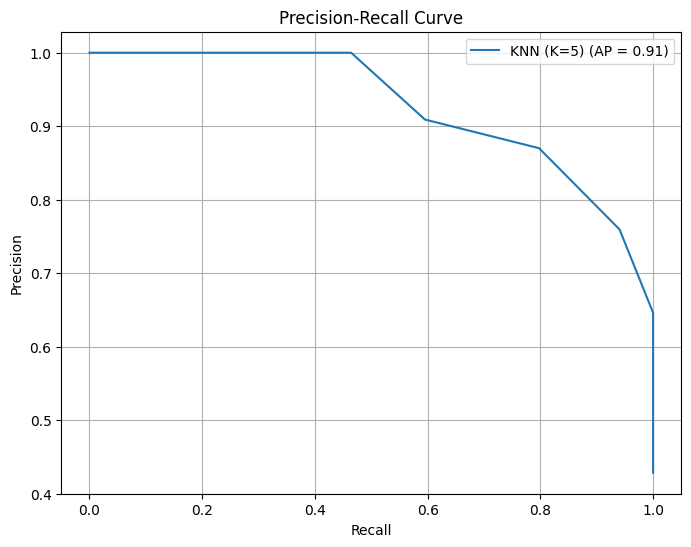

In [40]:
plot_precision_recall(grid.best_estimator_, X_test, y_test, label='KNN (K=5)')

---
Kesimpulan

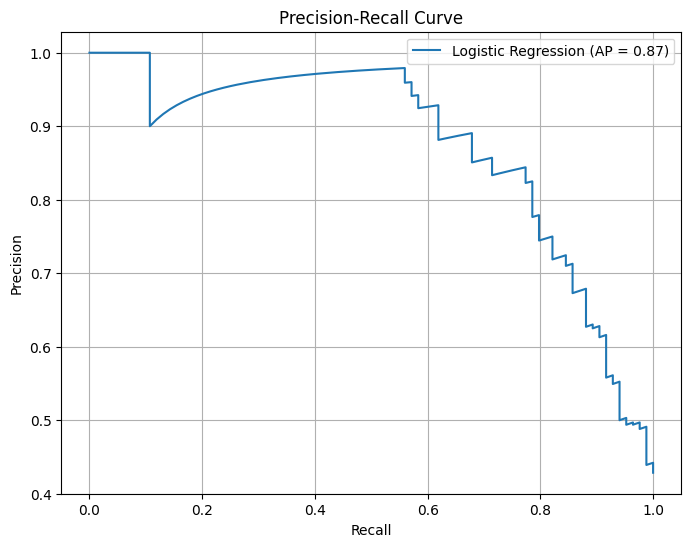

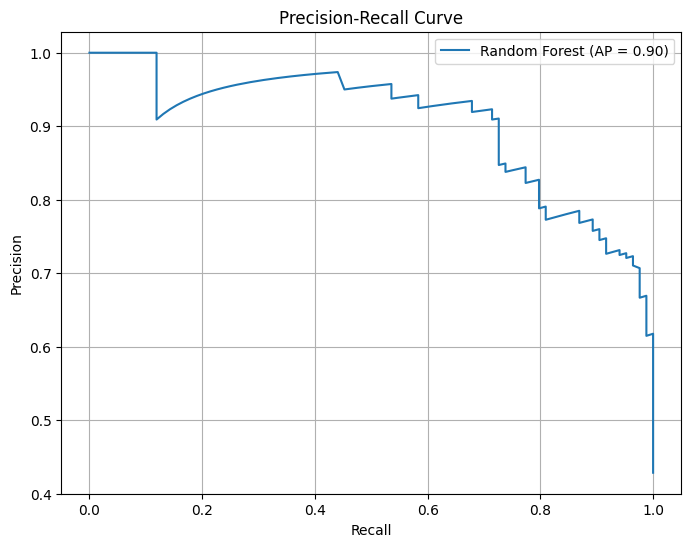

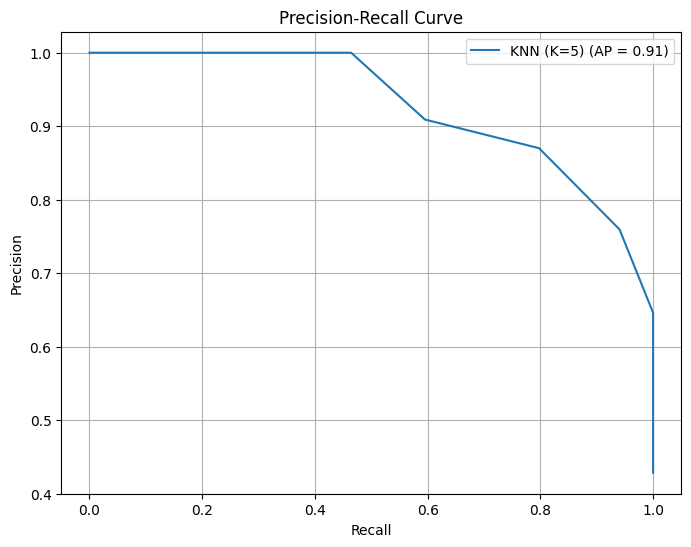

In [41]:
models = [
    ('Logistic Regression', logic_regress),
    ('Random Forest', rand_for_class),
    ('KNN (K=5)', grid.best_estimator_)
]

for name, model in models:
    plot_precision_recall(model, X_test, y_test, label=name)


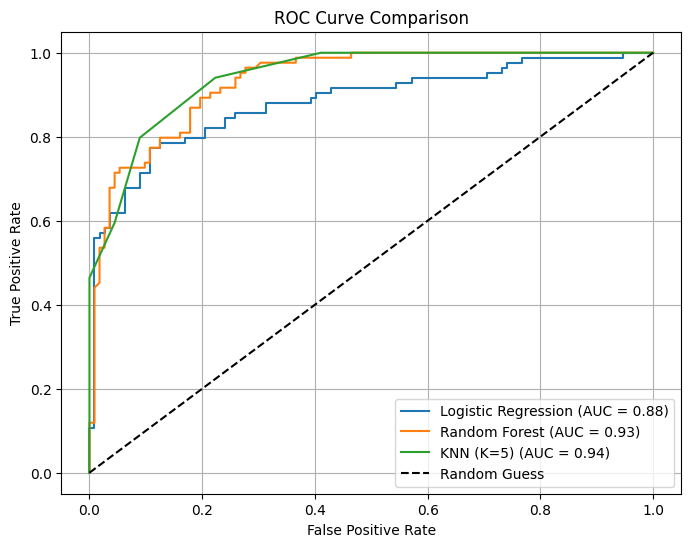

In [42]:
models = [
    ('Logistic Regression', logic_regress),
    ('Random Forest', rand_for_class),
    ('KNN (K=5)', grid.best_estimator_)
]
plot_roc(models, X_test, y_test)


---
Membandingkan Model Yang Mengubah Data Untuk Siap Dipakai Pada Model 'KNeighborsClassifier'

- Data Di Preprocessing Terlebih Dahulu Sebelum Melatih Model

In [43]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import IterativeImputer

titanic = sns.load_dataset("titanic")

def preprocess_data(df):
    df = df.drop_duplicates()
    orr_model = OrdinalEncoder()
    iter_model = IterativeImputer()

    column_not_number = list(df.select_dtypes(["object", "category", "bool"]).columns)
    df[column_not_number] = orr_model.fit_transform(df[column_not_number])

    column_that_has_null = list(df.isnull().sum().index)
    df[column_that_has_null] = iter_model.fit_transform(df[column_that_has_null])

    return df

- Mengubah Data Menggunakan Model 'StandardScalar'

In [44]:
titanic = preprocess_data(titanic)
Scaler_model = StandardScaler()

X = titanic.drop(["survived", "alive"], axis=1)
y = titanic["survived"]


X_scaled = Scaler_model.fit_transform(X)
y_pred = knn_model.predict(X_scaled)

print(classification_report(y, y_pred))

/tmp/ipython-input-1534590811.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_not_number] = orr_model.fit_transform(df[column_not_number])


              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       461
         1.0       0.87      0.80      0.83       323

    accuracy                           0.87       784
   macro avg       0.87      0.86      0.86       784
weighted avg       0.87      0.87      0.87       784



/tmp/ipython-input-1534590811.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_that_has_null] = iter_model.fit_transform(df[column_that_has_null])


- Mengubah Data Dengan Model 'RobustScaler'

In [45]:
from sklearn.preprocessing import RobustScaler
robust_model = RobustScaler()

X = titanic.drop(["survived", "alive"], axis = 1)
y = titanic["survived"]

X_robust = robust_model.fit_transform(X)
y_pred = knn_model.predict(X_robust)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84       461
         1.0       0.78      0.76      0.77       323

    accuracy                           0.82       784
   macro avg       0.81      0.81      0.81       784
weighted avg       0.81      0.82      0.81       784



- Mengubah Data Dengan Model 'MinMaxScaler'

In [46]:
from sklearn.preprocessing import MinMaxScaler

min_max_model = MinMaxScaler()

X = titanic.drop(["survived", "alive"], axis=1)
y = titanic["survived"]

X_min_max = min_max_model.fit_transform(X)
y_pred = knn_model.predict(X_min_max)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79       461
         1.0       0.86      0.32      0.47       323

    accuracy                           0.70       784
   macro avg       0.76      0.64      0.63       784
weighted avg       0.75      0.70      0.66       784



- Menampilkan Data Sebelum Diubah Dengan Model

In [47]:
print(X.head())

   pclass  sex   age  sibsp  parch     fare  embarked  class  who  adult_male  \
0     3.0  1.0  22.0    1.0    0.0   7.2500       2.0    2.0  1.0         1.0   
1     1.0  0.0  38.0    1.0    0.0  71.2833       0.0    0.0  2.0         0.0   
2     3.0  0.0  26.0    0.0    0.0   7.9250       2.0    2.0  2.0         0.0   
3     1.0  0.0  35.0    1.0    0.0  53.1000       2.0    0.0  2.0         0.0   
4     3.0  1.0  35.0    0.0    0.0   8.0500       2.0    2.0  1.0         1.0   

       deck  embark_town  alone  
0  5.415615          2.0    0.0  
1  2.000000          0.0    0.0  
2  5.227158          2.0    1.0  
3  2.000000          2.0    0.0  
4  4.932005          2.0    1.0  


- Menampilkan Hasil Model 'StandardScaler'

In [48]:
print(X_scaled)

[[ 0.88515843  0.77249035 -0.58465548 ...  1.00522697  0.58800782
  -1.1487065 ]
 [-1.45536167 -1.29451455  0.56578237 ... -1.3560067  -1.90425295
  -1.1487065 ]
 [ 0.88515843 -1.29451455 -0.29704602 ...  0.87494509  0.58800782
   0.87054439]
 ...
 [ 0.88515843 -1.29451455 -0.08668725 ...  0.99301177  0.58800782
  -1.1487065 ]
 [-1.45536167  0.77249035 -0.29704602 ... -1.3560067  -1.90425295
   0.87054439]
 [ 0.88515843  0.77249035  0.13436818 ...  0.5295272  -0.65812257
   0.87054439]]


- Menampilkan Hasil Model 'RobustScaler'

In [49]:
print(X_robust)

[[ 0.          0.         -0.4375     ...  0.48350761  0.
  -1.        ]
 [-1.         -1.          0.5625     ... -1.4327497  -2.
  -1.        ]
 [ 0.         -1.         -0.1875     ...  0.37777746  0.
   0.        ]
 ...
 [ 0.         -1.         -0.00464895 ...  0.47359438  0.
  -1.        ]
 [-1.          0.         -0.1875     ... -1.4327497  -2.
   0.        ]
 [ 0.          0.          0.1875     ...  0.09745385 -1.
   0.        ]]


- Menampilkan Data Hasil Model 'MinMaxScaler'

In [50]:
print(X_min_max)

[[1.         1.         0.27117366 ... 0.88627691 1.         0.        ]
 [0.         0.         0.4722292  ... 0.32730423 0.         0.        ]
 [1.         0.         0.32143755 ... 0.8554354  1.         1.        ]
 ...
 [1.         0.         0.35820076 ... 0.88338521 1.         0.        ]
 [0.         1.         0.32143755 ... 0.32730423 0.         1.        ]
 [1.         1.         0.39683338 ... 0.77366494 0.5        1.        ]]


- Mengubah Data Menjadi 'yes' atau 'no'

In [57]:
yes_no = ["yes" if i == 1 else "no" for i in y_pred]
pd.DataFrame(yes_no, columns=["survived"])

,survived
0,no
1,yes
2,yes
3,yes
4,no
...,...
779,no
780,yes
781,no
782,no
